In [4]:
import random
import numpy as np
import tensorflow as tf
import os
import json
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [5]:
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [6]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [7]:
kaggle_credential = json.load(open('kaggle.json'))

In [8]:
os.environ['KAGGLE_USERNAME'] = kaggle_credential['username']
os.environ['KAGGLE_KEY'] = kaggle_credential['key']

In [9]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

^C


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is B272-19DC

 Directory of c:\Users\Rashmika\Desktop\cnn

04/09/2025  02:58 AM    <DIR>          .
04/09/2025  02:38 AM    <DIR>          ..
04/08/2025  08:27 PM                 0 .gitignore
04/08/2025  08:26 PM                74 kaggle.json
04/09/2025  03:02 AM             4,599 plant disease classifier.ipynb
10/28/2019  12:25 PM     2,189,386,419 plantvillage-dataset.zip
               4 File(s)  2,189,391,092 bytes
               2 Dir(s)  84,106,153,984 bytes free


In [11]:
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [13]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir('plantvillage dataset/segmented')[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir('plantvillage dataset/color')[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir('plantvillage dataset/grayscale')[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [14]:
base_dir = "plantvillage dataset/color"

(256, 256, 3)


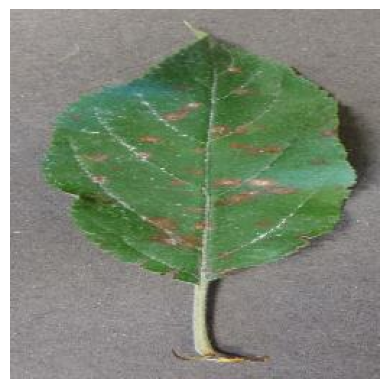

In [16]:
image_path = 'plantvillage dataset/color/Apple___Cedar_apple_rust/0ce943e7-3fed-41cb-8430-0e0f54ff2bc4___FREC_C.Rust 0014.JPG'

img = mpimg.imread(image_path)

print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
img_mat = mpimg.imread(image_path)

print(img_mat)

[[[164 159 156]
  [165 160 157]
  [166 161 158]
  ...
  [136 131 127]
  [138 133 129]
  [136 131 127]]

 [[168 163 160]
  [169 164 161]
  [170 165 162]
  ...
  [144 139 135]
  [147 142 138]
  [147 142 138]]

 [[165 160 157]
  [164 159 156]
  [163 158 155]
  ...
  [140 135 131]
  [140 135 131]
  [138 133 129]]

 ...

 [[158 154 155]
  [154 150 151]
  [154 150 151]
  ...
  [139 135 136]
  [129 125 126]
  [116 112 113]]

 [[159 155 156]
  [153 149 150]
  [153 149 150]
  ...
  [137 133 134]
  [132 128 129]
  [125 121 122]]

 [[153 149 150]
  [146 142 143]
  [147 143 144]
  ...
  [119 115 116]
  [117 113 114]
  [117 113 114]]]


In [20]:
img_size = 224
batch_size = 32

In [18]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [21]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [24]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [26]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/5


c:\Users\Rashmika\miniconda3\envs\pyenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 5349s 4s/step - accuracy: 0.5977 - loss: 1.7868 - val_accuracy: 0.8968 - val_loss: 0.3361
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1684s 1s/step - accuracy: 0.9141 - loss: 0.2739 - val_accuracy: 0.9392 - val_loss: 0.1850
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1342s 987ms/step - accuracy: 0.9652 - loss: 0.1103 - val_accuracy: 0.9835 - val_loss: 0.0509
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1698s 1s/step - accuracy: 0.9815 - loss: 0.0567 - val_accuracy: 0.9798 - val_loss: 0.0642
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 4497s 3s/step - accuracy: 0.9776 - loss: 0.0738 - val_accuracy: 0.9871 - val_loss: 0.0407


In [30]:
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 129s 95ms/step - accuracy: 0.9873 - loss: 0.0413


In [31]:
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 98.71%


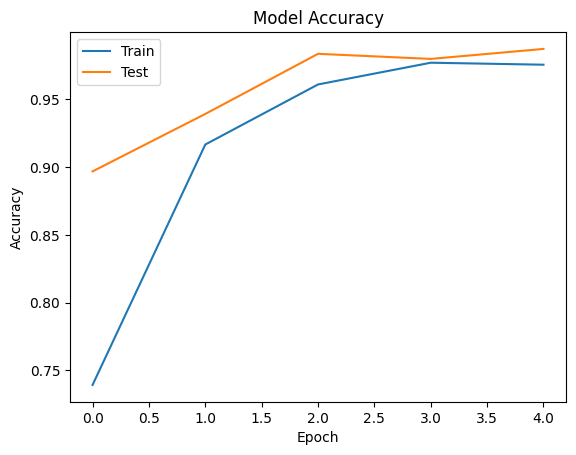

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

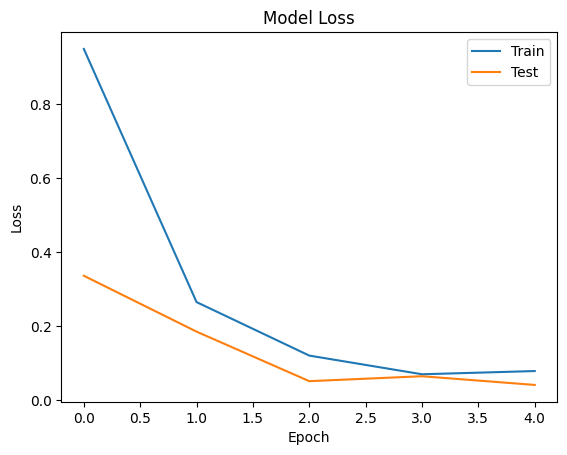

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

In [1]:
def load_and_preprocess_image(image_path, target_size=(224,224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32')/255

    return img_array

In [2]:
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=0)[0]
    predicted_class_name = class_indices[predicted_class_index]

    return predicted_class_name